# 6. Problem nadmiernego dopasowania

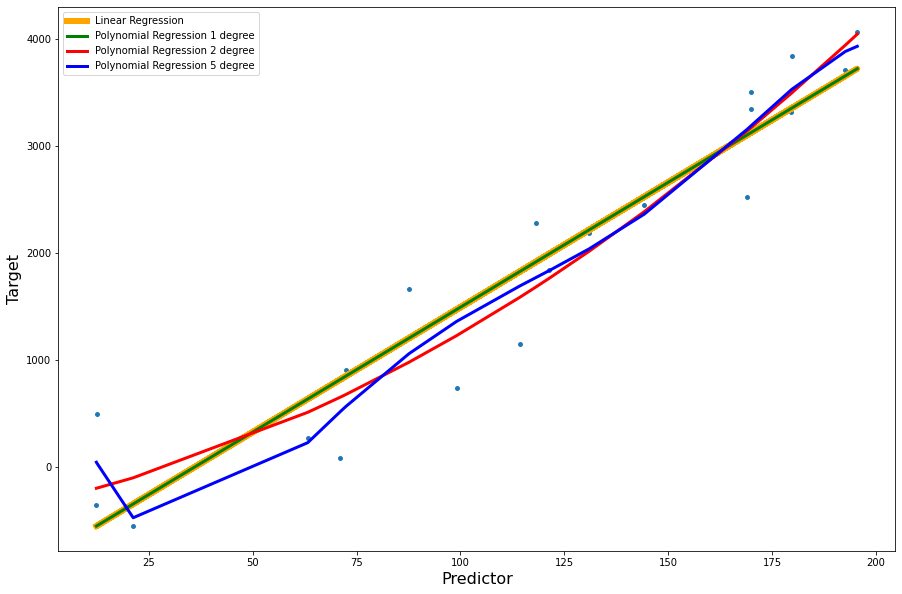

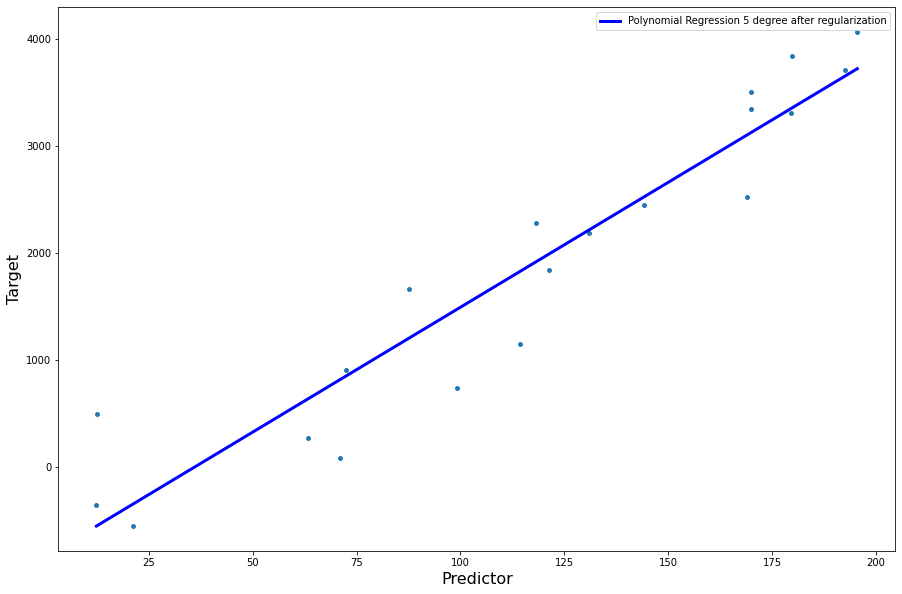

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

df = pd.read_csv("data6.tsv", sep="\t", header=None)
x, y = np.array(df[0]), np.array(df[1])

lm=LinearRegression()
lm.fit(x.reshape(-1,1), y.reshape(-1,1))
y_pred=lm.predict(x.reshape(-1,1))

polynominals = []
for d in [1,2,5]:
    Input=[('polynomial', PolynomialFeatures(degree=d)), ('modal', LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(x.reshape(-1,1), y.reshape(-1,1))
    poly_pred=pipe.predict(x.reshape(-1,1))
    sorted_zip = sorted(zip(x,poly_pred))
    x_poly, poly_pred = zip(*sorted_zip)
    if d == 5:
        clf = Ridge(alpha=1.0)
        model = clf.fit(np.array(x.reshape(-1,1)), y.reshape(-1,1))
        y_pred5 = model.predict(np.array(x_poly).reshape(-1,1))
    polynominals.append((x_poly, poly_pred))

plt.figure(figsize=(15,10))
plt.scatter(x, y, s=15)
plt.plot(x, y_pred, color='orange', label='Linear Regression', linewidth=6)
plt.plot(polynominals[0][0], polynominals[0][1], color='g', label='Polynomial Regression 1 degree', linewidth=3)
plt.plot(polynominals[1][0], polynominals[1][1], color='r', label='Polynomial Regression 2 degree', linewidth=3)
plt.plot(polynominals[2][0], polynominals[2][1], color='b', label='Polynomial Regression 5 degree', linewidth=3)

plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show() # widoczne jest tutaj zjawisko nadmiernego dopasowania (5 stopień)

plt.figure(figsize=(15,10))
plt.scatter(x, y, s=15)
plt.plot(polynominals[2][0], y_pred5, color='b', label='Polynomial Regression 5 degree after regularization', linewidth=3)
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show() # po regularyzacji